## Circuit Basics and Entanglement Practice

This notebook is to take a closer look at some of the linear algebra happening under the hood of the gates and see, mathematically, how entanglement is created and simulated.

In [1]:
# Import the needed packages and modules
import qiskit as qs
from math import pi

from qiskit import Aer

from qiskit.tools.visualization import plot_histogram
from qiskit.visualization import plot_state_city
from qiskit.quantum_info import DensityMatrix

# Setting to make sure that visuals show up in the notebook while I'm working
%matplotlib inline

In [2]:
# Print the Qiskit verison for reproducibility
qs.__qiskit_version__

{'qiskit-terra': '0.15.1',
 'qiskit-aer': '0.6.1',
 'qiskit-ignis': '0.4.0',
 'qiskit-ibmq-provider': '0.8.0',
 'qiskit-aqua': '0.7.5',
 'qiskit': '0.20.0'}

### Creating a single gate quantum circuit to see what the math is behind each gate

Look at the unitary matrix and then quantum state of the individual gates.  This is to see a sort of "before and after" on both the unitary and quantum states.  This is something like a regression test for the gates and their combinations.

#### The X Gate

Starting by adding an x gate to a simple quantum circuit with `.x()`

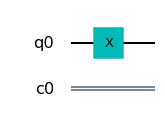

In [3]:
# Create a quantum circuit the old fashioned way.  Make the regesters and pass them into QuantumCircuit()
quant_reg = qs.QuantumRegister(1)
class_reg = qs.ClassicalRegister(1)

# Create the circuit
quant_circuit = qs.QuantumCircuit(quant_reg, class_reg)

# Add an X gate with .x()
quant_circuit.x(0)

# Draw the circuit with matplotlib
quant_circuit.draw(output = 'mpl')

In [4]:
# Bring in the unitary simulator to get the unitary matrix of the gate
unitary_simulator = Aer.get_backend('unitary_simulator')

# Execute the circuit with the unitary simulator in order to see and store the results
unitary_result = qs.execute(quant_circuit, backend = unitary_simulator).result()

# Get the unitary matrix from the results
unitary_matrix = unitary_result.get_unitary()

# Print the matrix
print(unitary_matrix)

[[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]]


In [5]:
# Bring in the state simulator to simulate the quantum circuit for the purpose of checking the quantum state
state_simulator = Aer.get_backend('statevector_simulator')

# Execute the circuit with the statevector simulator
state_result = qs.execute(quant_circuit, backend = state_simulator).result()

# Get the statevector from the results
state_vector = state_result.get_statevector()

# Print the matrix
print(state_vector)

[0.+0.j 1.+0.j]


#### The Hadamard Gate

Starting by adding an h gate to a simple quantum circuit with `.h()`

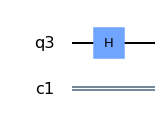

In [6]:
# Remake the circuit just to be explicit and so I don't have to track many different object names :)
quant_reg = qs.QuantumRegister(1)
class_reg = qs.ClassicalRegister(1)

quant_circuit = qs.QuantumCircuit(quant_reg, class_reg)

quant_circuit.h(0)

quant_circuit.draw(output = 'mpl')

In [7]:
# The unitary simulator has already been instantiated and can be reused
unitary_result = qs.execute(quant_circuit, backend = unitary_simulator).result()

unitary_matrix = unitary_result.get_unitary()

print(unitary_matrix)

[[ 0.70710678+0.00000000e+00j  0.70710678-8.65956056e-17j]
 [ 0.70710678+0.00000000e+00j -0.70710678+8.65956056e-17j]]


In [8]:
# The statevector simulator has also already been instanstiated and can be reused
state_result = qs.execute(quant_circuit, backend = state_simulator).result()

state_vector = state_result.get_statevector()

print(state_vector)

[0.70710678+0.j 0.70710678+0.j]


#### The Hadamard and X Gates

With a basic understanding of what's happening for each gate individually, add them to the same quantum register and check the matrices

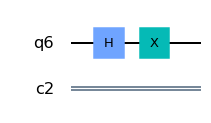

In [9]:
quant_reg = qs.QuantumRegister(1)
class_reg = qs.ClassicalRegister(1)

quant_circuit = qs.QuantumCircuit(quant_reg, class_reg)

# Adding each gate to the first qubit register
quant_circuit.h(0)
quant_circuit.x(0)

quant_circuit.draw(output = 'mpl')

In [10]:
unitary_result = qs.execute(quant_circuit, backend = unitary_simulator).result()
unitary_matrix = unitary_result.get_unitary()
print(unitary_matrix)

[[ 0.70710678+0.00000000e+00j -0.70710678+8.65956056e-17j]
 [ 0.70710678+0.00000000e+00j  0.70710678-8.65956056e-17j]]


In [11]:
state_result = qs.execute(quant_circuit, backend = state_simulator).result()
state_vector = state_result.get_statevector()
print(state_vector)

[0.70710678+0.j 0.70710678+0.j]


#### The Hadamard and X Gates (part deux)

Now that the two gates have been used in the same register, what happens when they're used in the same position of two different registers?

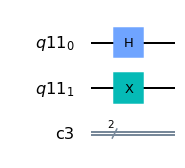

In [12]:
quant_reg = qs.QuantumRegister(2)
class_reg = qs.ClassicalRegister(2)

quant_circuit = qs.QuantumCircuit(quant_reg, class_reg)

# Add the H gate to the first register and the X gate to the second one
quant_circuit.h(quant_reg[0])
quant_circuit.x(quant_reg[1])

quant_circuit.draw(output = 'mpl')

In [13]:
unitary_result = qs.execute(quant_circuit, backend = unitary_simulator).result()
unitary_matrix = unitary_result.get_unitary()
print(unitary_matrix)

[[ 0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.70710678+0.00000000e+00j  0.70710678-8.65956056e-17j]
 [ 0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.70710678+0.00000000e+00j -0.70710678+8.65956056e-17j]
 [ 0.70710678+0.00000000e+00j  0.70710678-8.65956056e-17j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j]
 [ 0.70710678+0.00000000e+00j -0.70710678+8.65956056e-17j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j]]


This is the tensor product of H and X:

![title](img\hx_tensorprod_unitary.png)

In the notebook, the operation has already been performed which is why there are so many .707 decimal values shown

In [14]:
state_result = qs.execute(quant_circuit, backend = state_simulator).result()
state_vector = state_result.get_statevector()
print(state_vector)

[0.        +0.j 0.        +0.j 0.70710678+0.j 0.70710678+0.j]


#### The CX (Controlled NOT) Gate

Like the X gate there's a NOT operation happening, but what about the Controlled NOT operation from the CX gate?

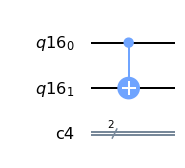

In [15]:
quant_reg = qs.QuantumRegister(2)
class_reg = qs.ClassicalRegister(2)

quant_circuit = qs.QuantumCircuit(quant_reg, class_reg)

# Unlike the previous gate, this gate exists in a register and targets another one
# Place it in the second register and target the first register
quant_circuit.cx(quant_reg[0], quant_reg[1])

quant_circuit.draw(output = 'mpl')

In [16]:
unitary_result = qs.execute(quant_circuit, backend = unitary_simulator).result()
unitary_matrix = unitary_result.get_unitary()
print(unitary_matrix)

[[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]]


In [17]:
state_result = qs.execute(quant_circuit, backend = state_simulator).result()
state_vector = state_result.get_statevector()
print(state_vector)

[1.+0.j 0.+0.j 0.+0.j 0.+0.j]


#### The Hadamard and CX Gates

Knowing how Each of the gates work mathematically, what happens when the H gate and CX gate are used together?

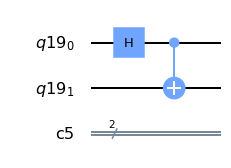

In [18]:
quant_reg = qs.QuantumRegister(2)
class_reg = qs.ClassicalRegister(2)

quant_circuit = qs.QuantumCircuit(quant_reg, class_reg)

quant_circuit.h(quant_reg[0])
quant_circuit.cx(quant_reg[0], quant_reg[1])

quant_circuit.draw(output = 'mpl')

In [19]:
unitary_result = qs.execute(quant_circuit, backend = unitary_simulator).result()
unitary_matrix = unitary_result.get_unitary()
print(unitary_matrix)

[[ 0.70710678+0.00000000e+00j  0.70710678-8.65956056e-17j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j]
 [ 0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.70710678+0.00000000e+00j -0.70710678+8.65956056e-17j]
 [ 0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.70710678+0.00000000e+00j  0.70710678-8.65956056e-17j]
 [ 0.70710678+0.00000000e+00j -0.70710678+8.65956056e-17j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j]]


So With these two gates connected together, the below is created as a tensor product of the two.

On the left is the unitary matrix of each gate, and on the right is there tensor product.  It's worth noting that Qiskit is automatically performing the final calculations.  The .707 is usually notated as 1/sqrt(2).

![title](img\hcx_unitary_compare.png)

In [20]:
state_result = qs.execute(quant_circuit, backend = state_simulator).result()
state_vector = state_result.get_statevector()
print(state_vector)

[0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


Similar to the above, this is the simulated quantum state of the two. 

![title](img\hcx_state_compare.png)

This is mostly interesting because these two qubits are now entangled.  This creates a Bell state.

Notice that the second register doesn't have an H gate but now has a similar matrix of values.  `[1/sqrt(2), 0] and [0, 1/sqrt(2)]`

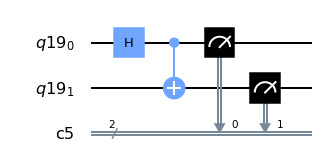

In [21]:
# Add measures on both qubit registers and point them to the classical registers (remember they have to decohere to measure)
# Point the measures from qubit registers [0,1] respectively to classical registers [0.1] respectively
quant_circuit.measure(quant_reg, class_reg)

quant_circuit.draw(output = 'mpl')

Now that the measures have been added, set up the Qasm simulator to execute the circuit on a simulated quantum device.

In [22]:
# Instantiate the simulator to run the circuit
# Qasm is quantum assembly language
qasm_sim = qs.Aer.get_backend('qasm_simulator')

# Execute the circuit using the qasm simulator above
# Store the results
quant_circuit_results = qs.execute(quant_circuit, backend = qasm_sim).result()

# Check the counts from the simulation of the circuit
quant_circuit_results.get_counts()

{'00': 535, '11': 489}

So, what's going on here is these two values show up only because of the tensor product above (the one from both gates)

If all possible values are an array like: `[00, 01, 10, 11]` then it makes sense that only two are shown.  The tensor product from the state simulator shows `[1/sqrt(2), 0, 0, 1/sqrt(2)]`

Quantum computing is probabilistic, so if there is zero probability of a value occuring at decoherence, then it won't show up in the results of the simulator.

A real quantum device would have quamtum errors and noise from interference, so there would be small occurrences of the values 01 and 10.

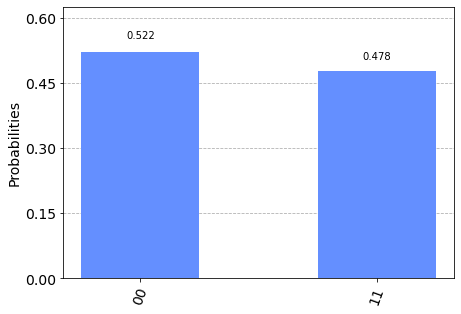

In [23]:
plot_histogram(quant_circuit_results.get_counts())

So the histogram shows here that in the simulation the values are about 50/50.  This means that the exact same circuit (for sufficiently large numbers of operations) produces a 00 or 11 50% of the time when it is measured.

But what about all of the other possible values here?  What about showing each register?  A histogram will not show them, so maybe another visual makes it a little more clear (and maybe cooler).

In [24]:
# Remaking the quantum circuit above without the measures because they cause a bunch of errors
# Measures are only used to measuring anyway and aren't needed to check the simulated quantum state
quant_reg = qs.QuantumRegister(2)

quant_circuit = qs.QuantumCircuit(quant_reg)

quant_circuit.h(quant_reg[0])
quant_circuit.cx(quant_reg[0], quant_reg[1])

# Get the density matrix of the quantum circuit's simulated quantum state
quant_circuit_density_matrix = DensityMatrix.from_instruction(quant_circuit)

# Print the density matrix that was just derived from the circuit
print(quant_circuit_density_matrix)

DensityMatrix([[0.5+0.j, 0. +0.j, 0. +0.j, 0.5+0.j],
               [0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j],
               [0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j],
               [0.5+0.j, 0. +0.j, 0. +0.j, 0.5+0.j]],
              dims=(2, 2))


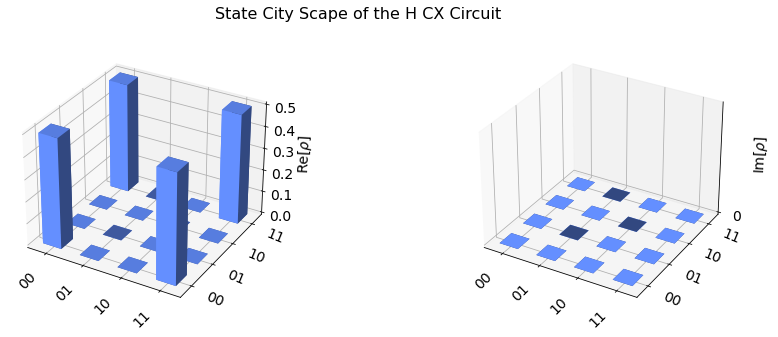

In [25]:
# Plot the state cityscape of the quantum state
plot_state_city(quant_circuit_density_matrix, title="State City Scape of the H CX Circuit")